Dataset shape: (1025, 23)
Non-numeric columns: Index(['sex_Male', 'chest_pain_type_Atypical angina',
       'chest_pain_type_Non-anginal pain', 'chest_pain_type_Typical angina',
       'fasting_blood_sugar_Lower than 120 mg/ml', 'rest_ecg_Normal',
       'rest_ecg_ST-T wave abnormality', 'exercise_induced_angina_Yes',
       'slope_Flat', 'slope_Upsloping', 'vessels_colored_by_flourosopy_One',
       'vessels_colored_by_flourosopy_Three',
       'vessels_colored_by_flourosopy_Two',
       'vessels_colored_by_flourosopy_Zero', 'thalassemia_No',
       'thalassemia_Normal', 'thalassemia_Reversable Defect'],
      dtype='object')
After encoding: (1025, 23)


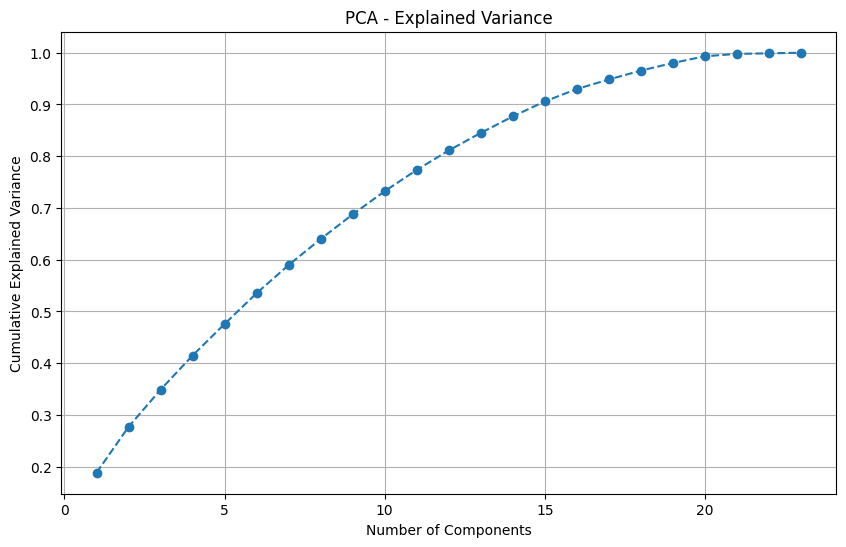

✅ PCA reduced dataset saved as 'HeartDisease_PCA.csv' with 5 components


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Load the Cleaned Data
data = pd.read_csv("cleaned_heart_disease.csv")  # ← use cleaned dataset

print("Dataset shape:", data.shape)
print("Non-numeric columns:", data.select_dtypes(exclude=['number']).columns)

# Encode categorical variables if needed
data_encoded = pd.get_dummies(data, drop_first=True)

print("After encoding:", data_encoded.shape)

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)

#  PCA Fitting
pca = PCA()
pca.fit(scaled_data)

explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

#  Plot Explained Variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid(True)
plt.show()

# Transform Data (choose top k components)
k = 5  # adjust after checking variance plot
pca_final = PCA(n_components=k)
data_pca = pca_final.fit_transform(scaled_data)

# Save PCA reduced dataset separately
pca_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(k)])
pca_df.to_csv("HeartDisease_PCA.csv", index=False)

print(f" PCA reduced dataset saved as 'HeartDisease_PCA.csv' with {k} components")
